In [1]:
import scipy.io
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
data = scipy.io.loadmat('NavierStokes_V1e-5_N1200_T20.mat')
print(data.keys())
data_u = data['u']
print(data_u.shape) #B, H, W, T

dict_keys(['__header__', '__version__', '__globals__', 'a', 'u', 't'])
(1200, 64, 64, 20)


In [3]:
# B T C H W
#1. 写一个dataset
#2. Dataloader

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import scipy.io

class NSDataset(Dataset):
    def __init__(self, path_file):
        data = scipy.io.loadmat(path_file)
        self.data = data['u']
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        inputs = self.data[index, :, :, :10]   # 64 x 64 x 10 (H x W x T_in)
        targets = self.data[index, :, :, 10:]  # 64 x 64 x 10 (H x W x T_out)
        
        inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(0)    # (1, 64, 64, 10)
        targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(0)  # (1, 64, 64, 10)
        
        inputs = inputs.permute(3, 0, 1, 2)   # (10, 1, 64, 64)
        targets = targets.permute(3, 0, 1, 2) # (10, 1, 64, 64)
        
        return inputs, targets

def get_dataloaders(path_file, batch_size=1, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    dataset = NSDataset(path_file=path_file)
    total_size = len(dataset)
    
    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)
    test_size = total_size - train_size - val_size  
    
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = get_dataloaders(
    path_file='/Users/wuhao/Desktop/mamba_dit/dataset/NavierStokes_V1e-5_N1200_T20.mat',
    batch_size=1
)

for inputs, targets in train_loader:
    print("Train:", inputs.shape, targets.shape)
    break  

for inputs, targets in val_loader:
    print("Validation:", inputs.shape, targets.shape)
    break  

for inputs, targets in test_loader:
    print("Test:", inputs.shape, targets.shape)
    break  


Train: torch.Size([1, 10, 1, 64, 64]) torch.Size([1, 10, 1, 64, 64])
Validation: torch.Size([1, 10, 1, 64, 64]) torch.Size([1, 10, 1, 64, 64])
Test: torch.Size([1, 10, 1, 64, 64]) torch.Size([1, 10, 1, 64, 64])


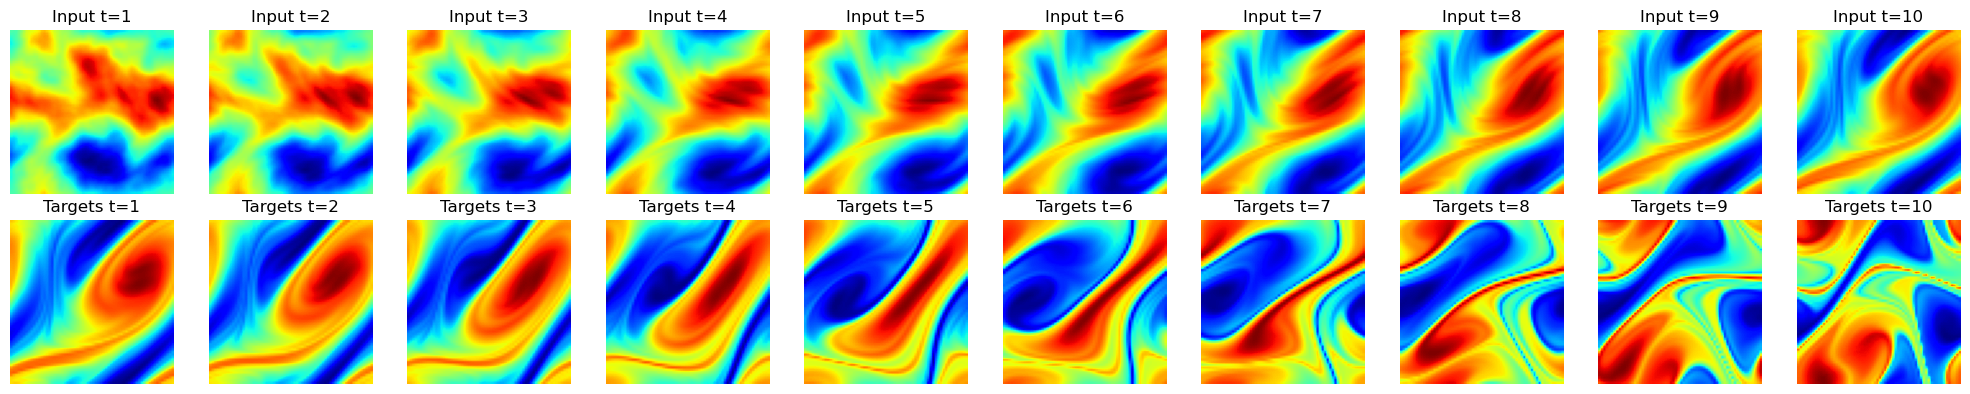

In [7]:
import matplotlib.pyplot as plt

def vis_inputs_target(inputs, targets):
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    
    for i in range(10):
        axes[0, i].imshow(inputs[0, i, 0, :, :].cpu().numpy(), cmap='jet')
        axes[0, i].set_title(f"Input t={i+1}")
        axes[0, i].axis('off')
        
    for i in range(10):
        axes[1, i].imshow(targets[0, i, 0, :, :].cpu().numpy(), cmap='jet')
        axes[1, i].set_title(f"Targets t={i+1}")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

for inputs, targets in train_dataloader:
    vis_inputs_target(inputs, targets)
    break

In [10]:
sample = inputs[0, 1, 0, :, :]
print(sample.shape)

torch.Size([64, 64])
